# Clustering: Customer segmentation

In [10]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\customer_data.csv')
df.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [7]:
df.isnull().sum()

INCOME    0
SPEND     0
dtype: int64

In [8]:
df.describe()

,INCOME,SPEND
count,303.000000,303.000000
mean,245.273927,149.646865
std,48.499412,22.905161
min,126.000000,71.000000
25%,211.000000,133.500000
50%,240.000000,153.000000
75%,274.000000,166.000000
max,417.000000,202.000000


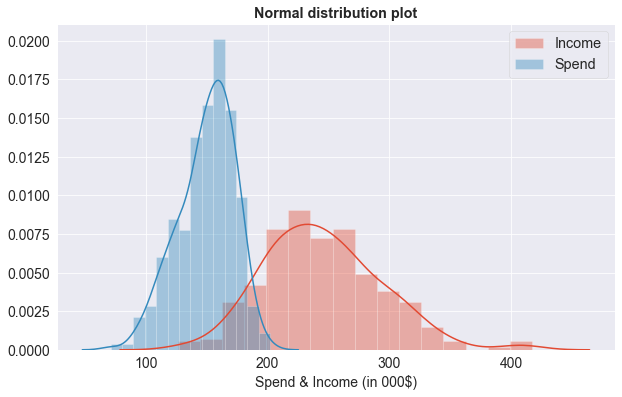

In [190]:
# Distribution Plot

sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.distplot(df['INCOME'], label = 'Income')
sns.distplot(df['SPEND'], label = 'Spend')
plt.title('Normal distribution plot', fontweight = 'bold')
plt.xlabel('Spend & Income (in 000$)', fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 'x-large')
plt.show()

# Elbow Method 

In [160]:
wcss = []

for cluster in range(1, 10):
    model_kmeans = KMeans(n_clusters = cluster, init = 'k-means++').fit(X)
    model_kmeans.predict(X)
    wcss.append(model_kmeans.inertia_)

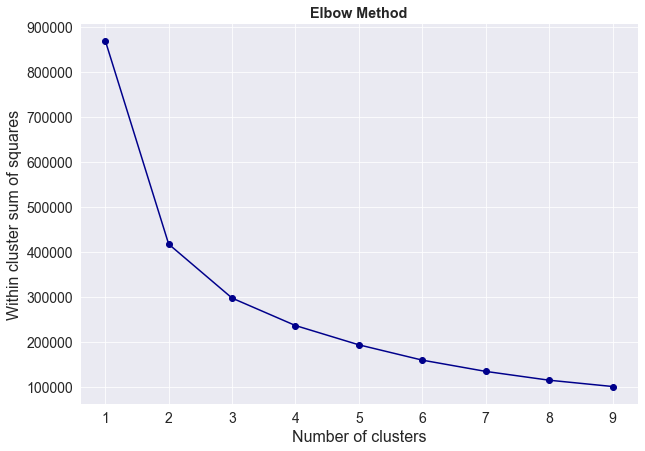

In [164]:
# Plotting clusters
plt.figure(figsize = (10,7))
plt.title("Elbow Method", fontweight = 'bold')
plt.plot(np.arange(1,10), wcss, marker = 'o', c = 'Darkblue')
plt.xlabel('Number of clusters', fontsize = 16)
plt.ylabel('Within cluster sum of squares', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# Partitional clustering: K-Means

In [110]:
from sklearn.cluster import KMeans

X = df

model = KMeans(n_clusters=4, init='k-means++')
model.fit(X)
y_pred = model.predict(X)

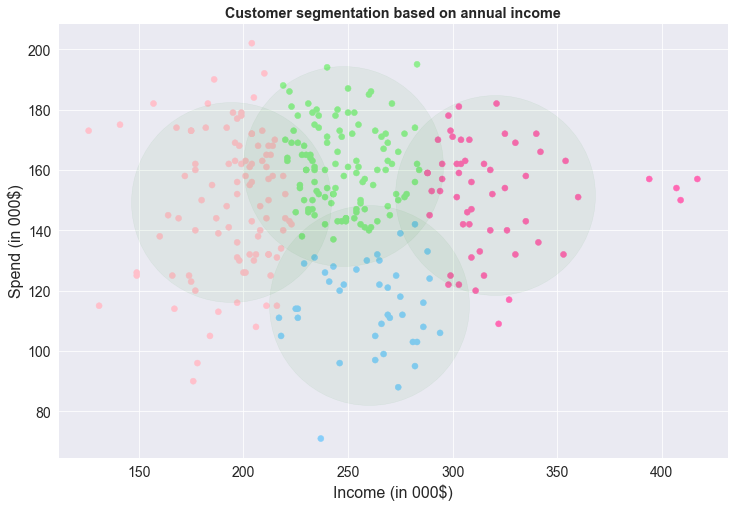

In [191]:
# Color mapping
label_color = {0 : 'pink',
                        1 : 'hotpink',
                        2 : 'lightskyblue',
                        3 : 'lightgreen'}

# Plotting clusters
plt.figure(figsize = (12,8))
plt.title("Customer segmentation based on annual income", fontweight = 'bold')
plt.xlabel('Income (in 000$)', fontsize = 16)
plt.ylabel('Spend (in 000$)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.scatter(X['INCOME'], X['SPEND'], c = [label_color[l] for l in model.labels_])
# Income:0, Spend:1 
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c = 'Green', s = 40000, alpha = 0.05)
plt.show()

In [192]:
# Import dataset

df = pd.read_csv(r'C:\Users\Dell\Desktop\Data.csv')

# Age and List price 
total = []
cust_id = sorted(df['customer_id'].unique())
age = []

for cid in cust_id:
    
    total.append(sum(df[df['customer_id'] == cid]['list_price']))
    age.append(max(df[df['customer_id'] == cid]['Age']))
    
data = pd.DataFrame({'Total_spend' : total, 'Age' : age})

In [193]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 10):
    
    model = KMeans(n_clusters = k, init = 'k-means++').fit(data)
    model.predict(data)
    wcss.append(model.inertia_)

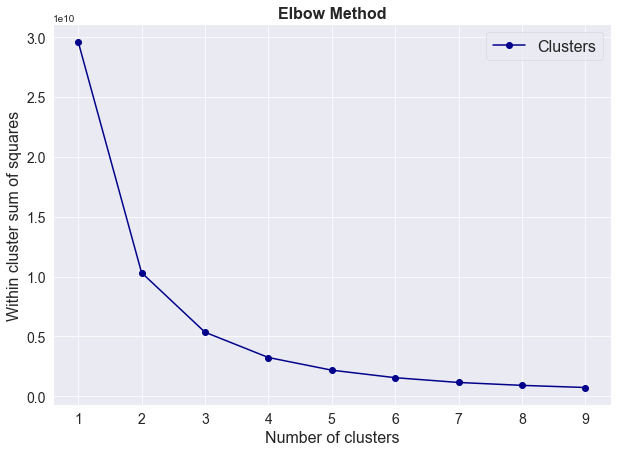

In [194]:
# Finding the optimum value of 'k' 
sns.set_style('darkgrid')
plt.figure(figsize = (10,7))
plt.title("Elbow Method", fontweight = 'bold', fontsize = 16)
plt.plot(np.arange(1,10), wcss, marker = 'o', c = 'Darkblue', label = 'Clusters')
plt.xlabel('Number of clusters', fontsize = 16)
plt.ylabel('Within cluster sum of squares', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(fontsize = 16)
plt.show()

In [195]:
model = KMeans(n_clusters = 2, init = 'k-means++').fit(data)
y_pred = model.predict(data)

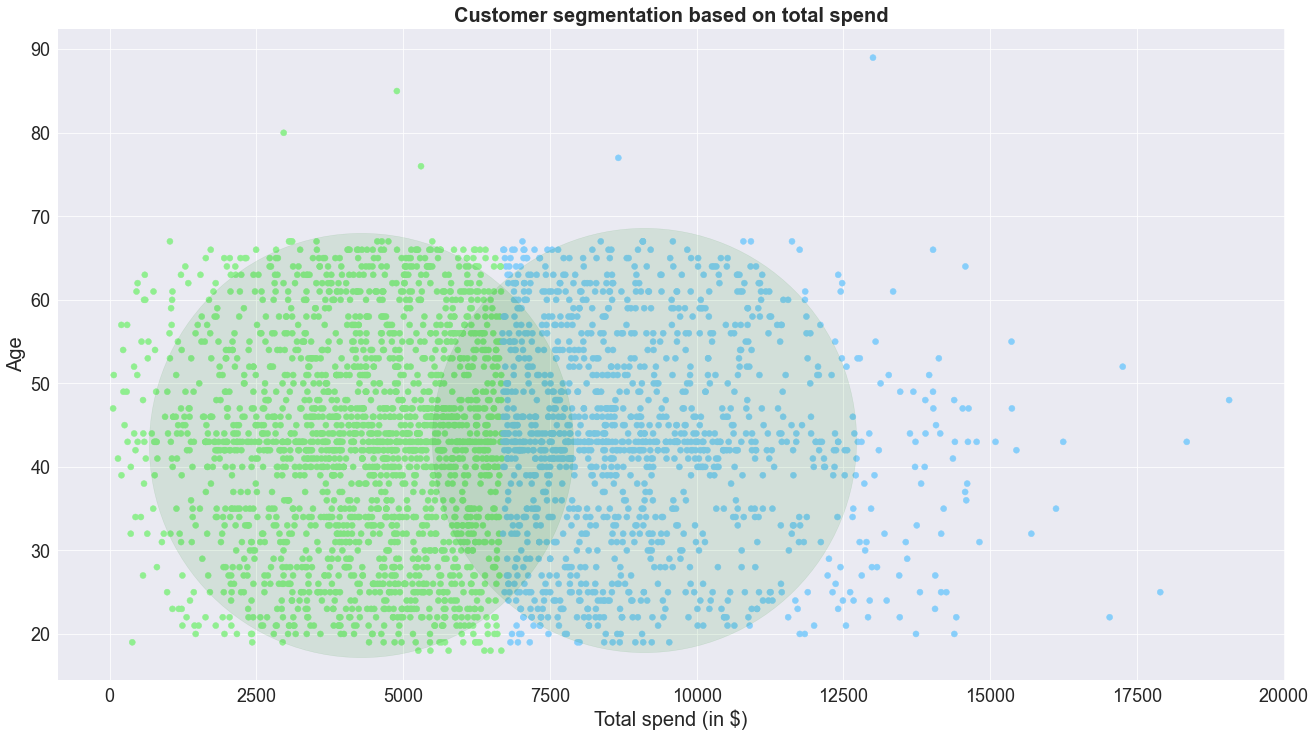

In [200]:
# Color mapping
label_color = {
    1 : 'lightskyblue',
    0 : 'lightgreen'
}

# Plotting clusters
plt.figure(figsize = (22,12))
plt.title("Customer segmentation based on total spend", fontweight = 'bold', fontsize = 20)
plt.xlabel('Total spend (in $)', fontsize = 20)
plt.ylabel('Age', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.scatter(data[['Total_spend']], data[['Age']], c = [label_color[l] for l in model.labels_])
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c = 'green', s = 180000, alpha = 0.10, marker = 'o')
plt.show()

> This is a bonafide work of Aarush Gandhi